## **Fashion Mnist Prediction Model**

@ Prepared By: Chandan D. Chaudhari

### **Mnist Dataset Label	Description**

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd
# import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# import filter warnings libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Datasets from keras library
from keras.datasets import fashion_mnist

In [3]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Checking shape of the Dataset
train_images[0].shape,train_labels[0].shape,test_images[0].shape,test_labels[0].shape

((28, 28), (), (28, 28), ())

The train_image[0] label is :  9


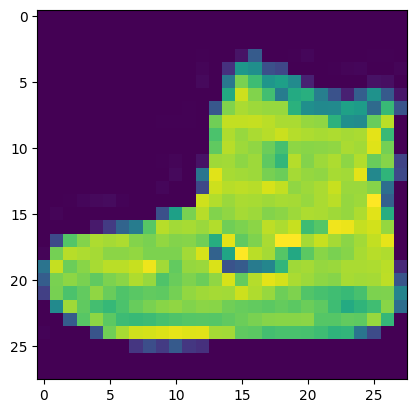

In [5]:
# Visualization
plt.imshow(train_images[0])
print('The train_image[0] label is : ',train_labels[0])

The train_image[1] label is :  0


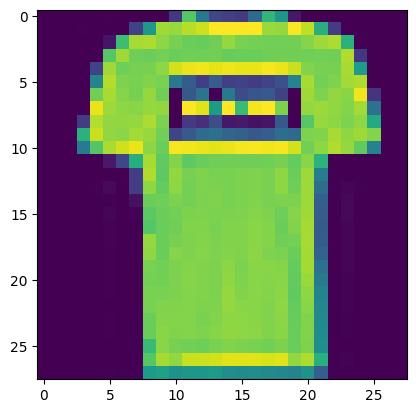

In [6]:
# Visualization
plt.imshow(train_images[1])
print('The train_image[1] label is : ',train_labels[1])

## **Checking Different Images with Some Random Numbers**

In [7]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

The train_image[100] label is :  T-shirt/top


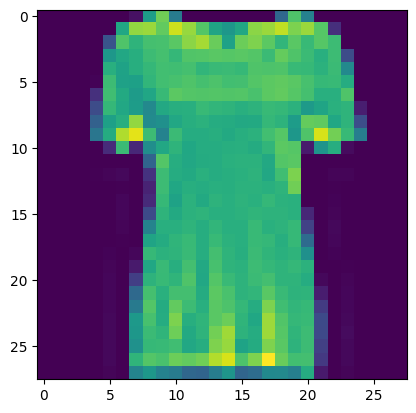

In [8]:
index = 10
plt.imshow(train_images[index])
print('The train_image[100] label is : ',labels[train_labels[index]])

The train_image[100] label is :  Bag


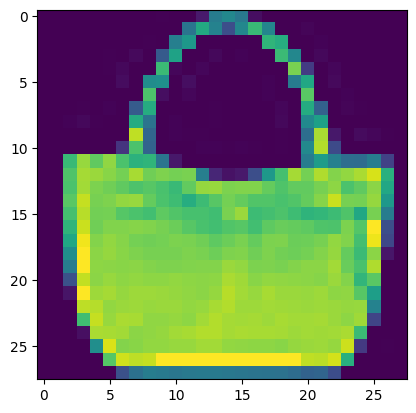

In [9]:
index = 100
plt.imshow(train_images[index])
print('The train_image[100] label is : ',labels[train_labels[index]])

The train_image[100] label is :  Trouser


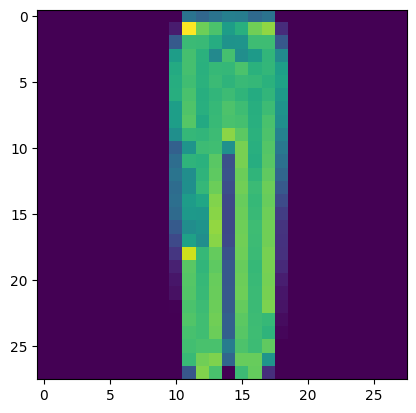

In [10]:
index = 1000
plt.imshow(train_images[index])
print('The train_image[100] label is : ',labels[train_labels[index]])

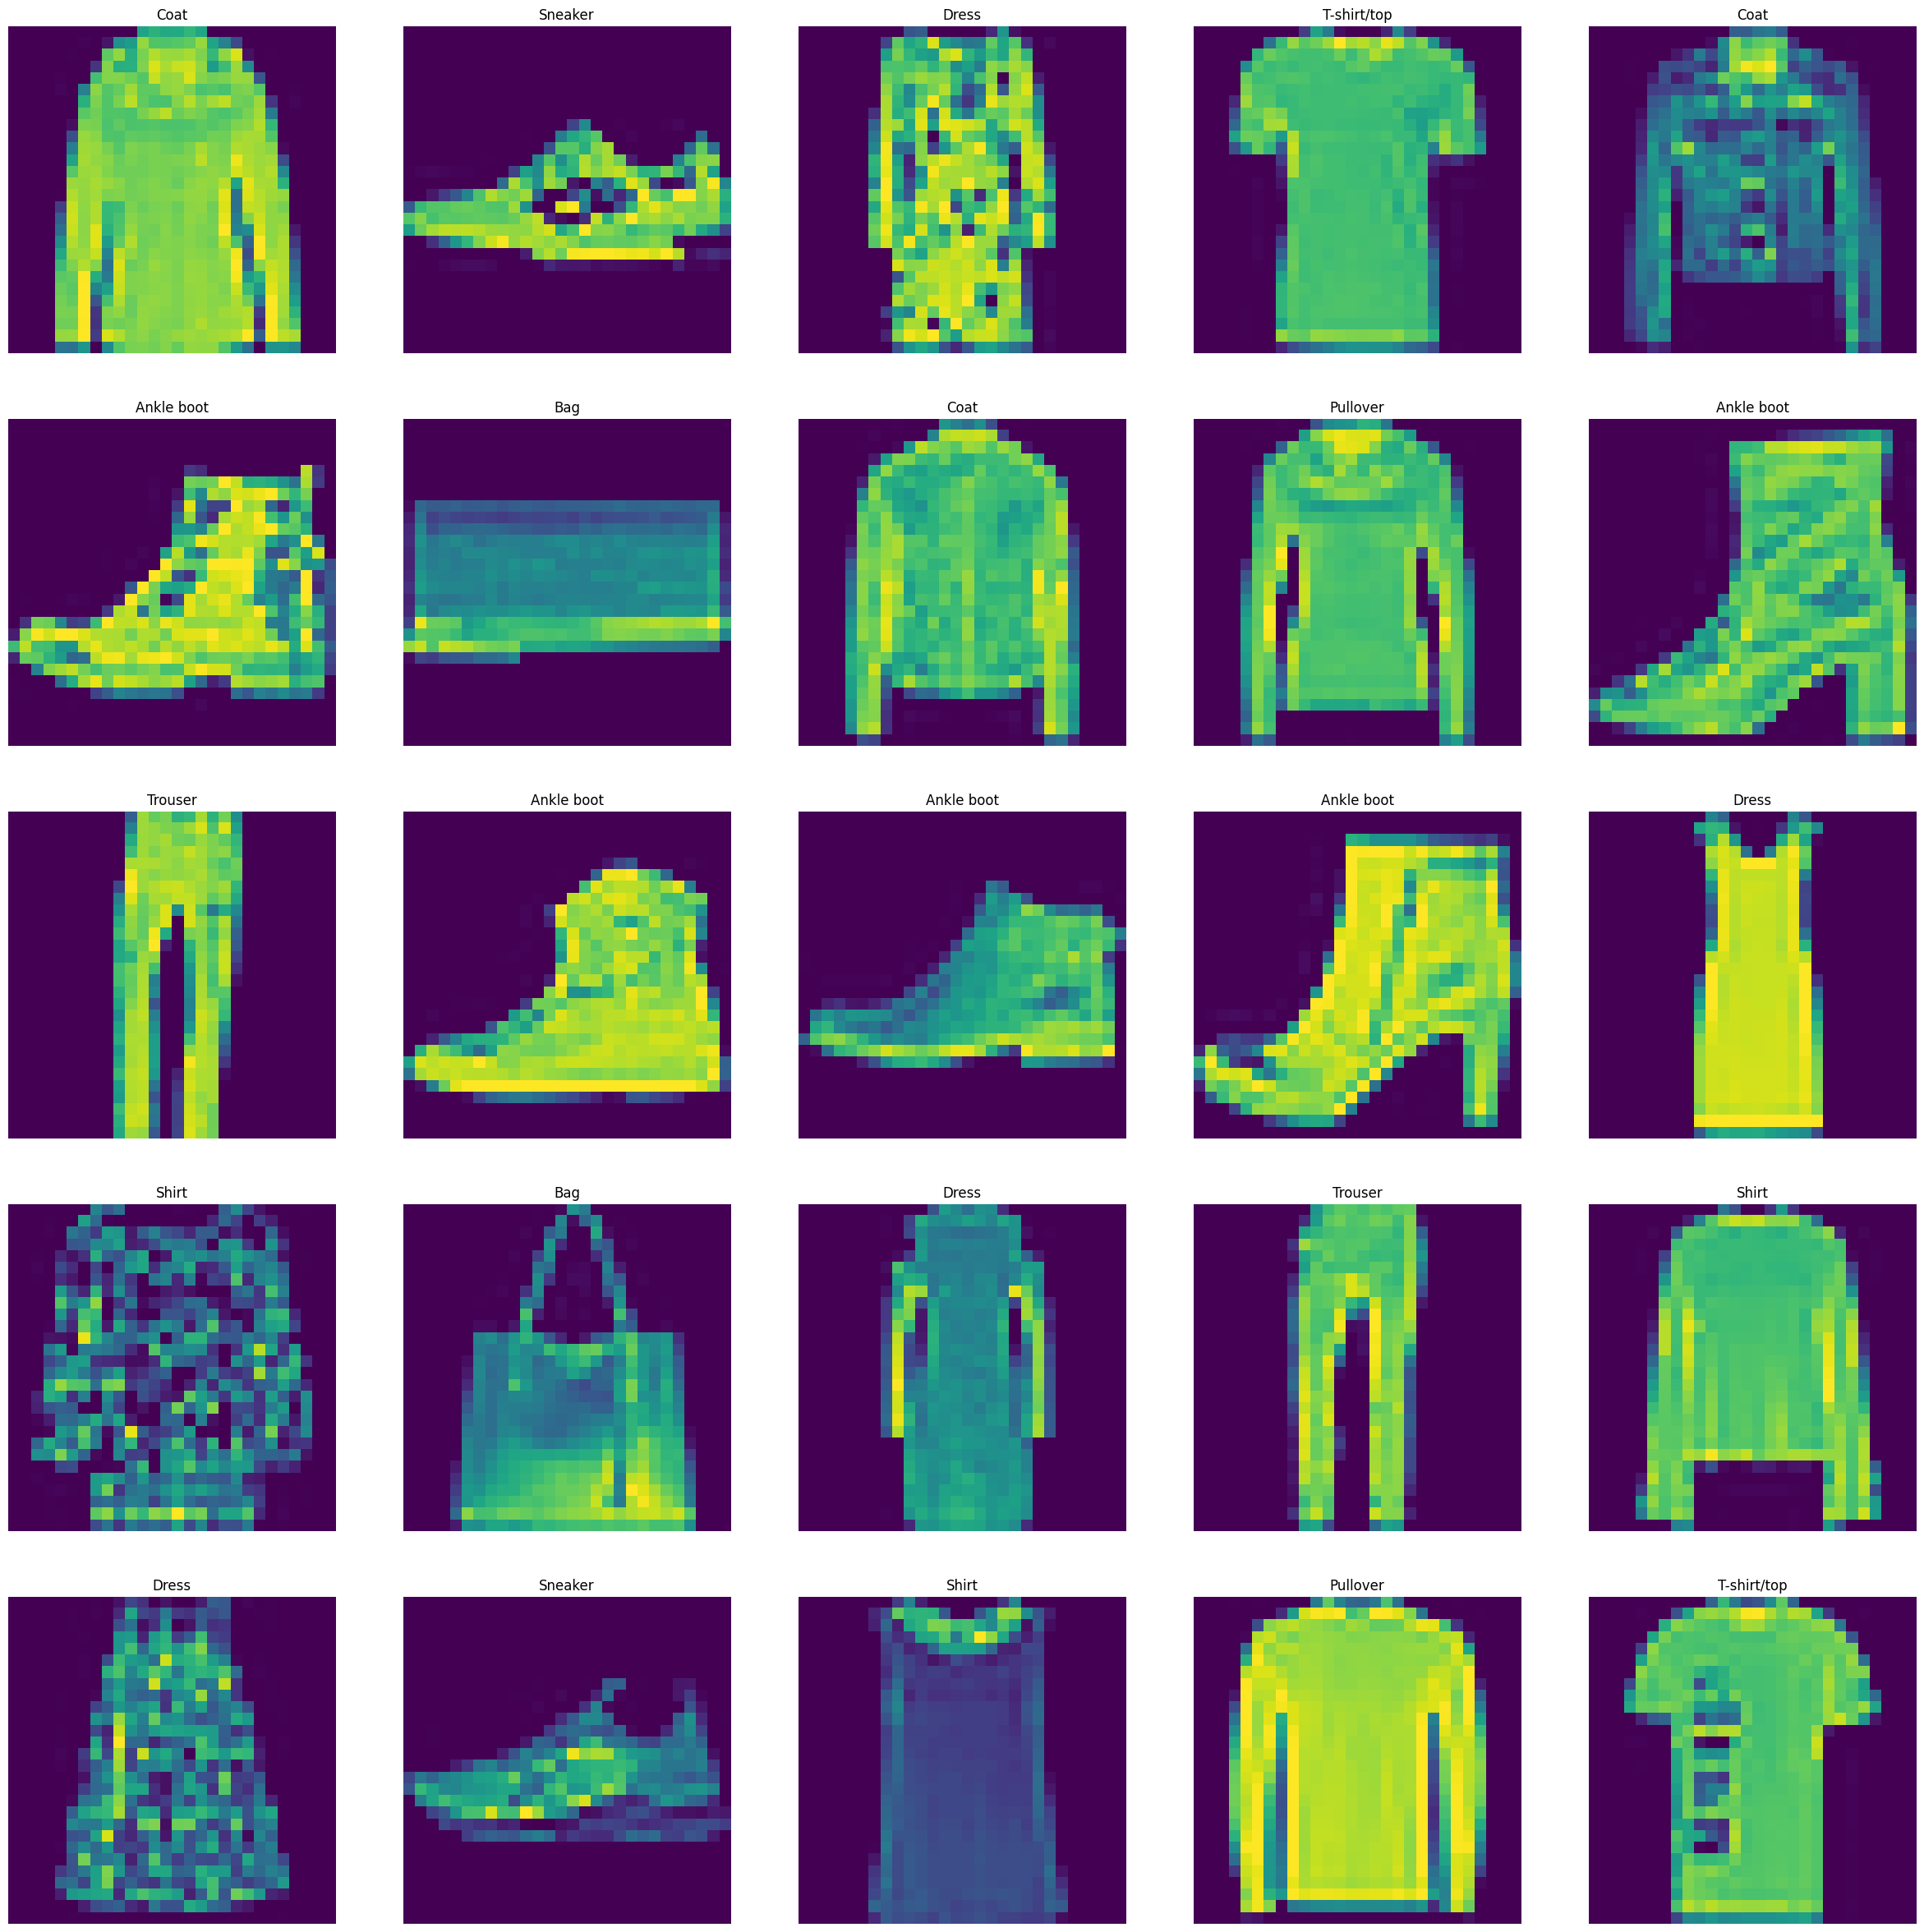

In [11]:
import random
plt.figure(figsize = (30,30))
for i in range(25):
    index = random.randint(0,60000)
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[index])
    plt.title(labels[train_labels[index]])
    plt.axis('off')

## **Model Building**

- Input Shape = 28*28

- Output Shape = 10 (One Per Class, As Dataset Contains Total 10 Class)

- Loss = CategoricalCrossEntropy()

- Note: If data labels are in numeric form then it is advisable to convert to categorical using one_hot method.as per documentation of CategoricalCrossEntropy. But If data labels are numeric then we can use sparse_categorical_crossentropy Method to get the results

_ Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy


In [12]:
print('Checking Shape of the Image : ',train_images.shape)
print('Checking Output Shape : ',len(labels))

Checking Shape of the Image :  (60000, 28, 28)
Checking Output Shape :  10


In [13]:
# Checking Datatype of train_images and test_images
train_images.dtype,test_images.dtype

(dtype('uint8'), dtype('uint8'))

In [14]:
# Normalize images to the range [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [15]:
train_images.max(),train_images.min(),test_images.max(),test_images.min()

(1.0, 0.0, 1.0, 0.0)

## **Using sparse_categorical_crossentropy Method**

In [16]:
import tensorflow
tensorflow.random.set_seed(42)

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

# Create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 input to a 1D vector
model.add(Dense(128, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(train_images,train_labels,epochs = 10,validation_data = (test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7733 - loss: 0.6466 - val_accuracy: 0.8529 - val_loss: 0.4109
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8622 - loss: 0.3807 - val_accuracy: 0.8557 - val_loss: 0.3908
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8764 - loss: 0.3412 - val_accuracy: 0.8532 - val_loss: 0.3980
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8845 - loss: 0.3128 - val_accuracy: 0.8641 - val_loss: 0.3725
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8895 - loss: 0.2936 - val_accuracy: 0.8646 - val_loss: 0.3654
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8963 - loss: 0.2769 - val_accuracy: 0.8659 - val_loss: 0.3696
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8993 - loss: 0.2672 - val_accuracy: 0.8660 - val_loss: 0.3578
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9046 - loss: 0.2

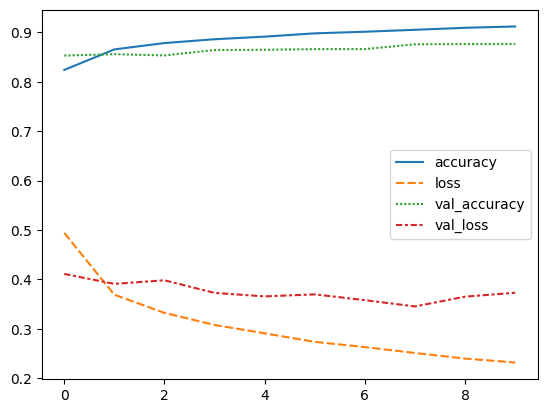

In [17]:
sns.lineplot(model.history.history)
plt.show()

In [18]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3646


[0.3728100657463074, 0.8762999773025513]

The test_image[0] label is :  Ankle boot


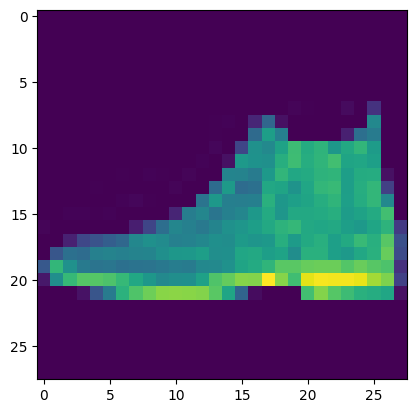

In [19]:
plt.imshow(test_images[0])
print('The test_image[0] label is : ',labels[test_labels[0]])

In [20]:
import tensorflow
tensorflow.random.set_seed(42)
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 input to a 1D vector
model.add(Dense(128, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7715 - loss: 0.6460 - val_accuracy: 0.8515 - val_loss: 0.4092
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8619 - loss: 0.3837 - val_accuracy: 0.8564 - val_loss: 0.3896
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8730 - loss: 0.3415 - val_accuracy: 0.8597 - val_loss: 0.3741
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8829 - loss: 0.3161 - val_accuracy: 0.8620 - val_loss: 0.3756
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8880 - loss: 0.2988 - val_accuracy: 0.8636 - val_loss: 0.3662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8942 - loss: 0.2813 - val_accuracy: 0.8631 - val_loss: 0.3773
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8978 - loss: 0.2691 - val_accuracy: 0.8649 - val_loss: 0.3739
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9020 - loss: 0.256

In [21]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8695 - loss: 0.3828


[0.3847944736480713, 0.8687999844551086]

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 80)                  │          10,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           4,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,082 (1.32 MB)

 Trainable params: 115,360 (450.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,722 (901.26 KB)

In [23]:
y_pred = model.predict(test_images)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.7673256e-08, 5.3427470e-07, 1.6432173e-07, ..., 1.7253954e-02,
        8.1300790e-08, 9.8249990e-01],
       [1.4551305e-06, 6.3557930e-11, 9.9841380e-01, ..., 3.9961483e-20,
        6.3965340e-11, 9.0688357e-17],
       [2.9719834e-11, 9.9999994e-01, 2.4006679e-16, ..., 4.3195970e-36,
        7.3270348e-12, 8.1362155e-22],
       ...,
       [2.9094176e-08, 1.1534941e-11, 6.1170724e-10, ..., 2.3191275e-10,
        9.9999815e-01, 4.1197271e-11],
       [4.2842893e-10, 9.9999994e-01, 9.6079123e-14, ..., 3.0157773e-25,
        6.4230981e-09, 2.7295139e-15],
       [1.6508016e-04, 3.0123251e-09, 2.5862078e-06, ..., 1.3136466e-03,
        8.9875993e-04, 6.0582784e-05]], dtype=float32)

In [24]:
y_pred[0]

array([7.7673256e-08, 5.3427470e-07, 1.6432173e-07, 1.0404699e-07,
       5.1081002e-09, 2.4372639e-04, 1.3732351e-06, 1.7253954e-02,
       8.1300790e-08, 9.8249990e-01], dtype=float32)

In [25]:
y_pred_class = y_pred.argmax(axis = 1)
y_pred_class
y_pred_class[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

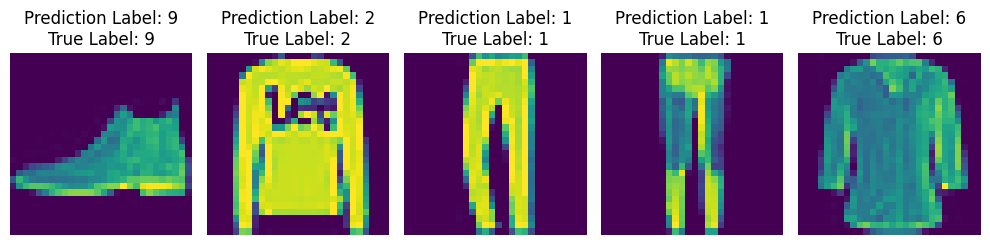

In [26]:
num_images = 5  # Number of images to display
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)

    # Display the image
    plt.imshow(test_images[i])

    # Display the predicted and actual labels
    predicted_label = y_pred_class[i]
    true_label = np.argmax(test_labels[i])  # Since test_labels are one-hot encoded
    plt.title(f"Prediction Label: {predicted_label}\nTrue Label: {true_label}")

    plt.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()